In [ ]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()

import numpy as np

tf.get_logger().setLevel('ERROR')

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
pip install tensorflow-privacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.2 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.23.0
    Uninstalling tensorflow-probability-0.23.0:
      Successfully uninstalled tensorflow-probability-0.23.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
import tensorflow_privacy

from tensorflow_privacy.privacy.analysis import compute_dp_sgd_privacy

In [ ]:
import tensorflow as tf
import numpy as np

# Load CIFAR-10 dataset
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to the range [0, 1]
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

train_data = train_data[:500]
train_labels = train_labels[:500]
test_data=test_data[:100]
test_labels=test_labels[:100]

# Convert labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)


# Assertions to ensure data is properly normalized
assert train_data.min() == 0.
assert train_data.max() == 1.
assert test_data.min() == 0.
assert test_data.max() == 1.


170498071/170498071 [==============================] - 11s 0us/step


In [ ]:
epochs = 100
batch_size = 2

In [ ]:
l2_norm_clip = 1.5
noise_multiplier = 0.34
num_microbatches = 2
learning_rate = 0.00025

if batch_size % num_microbatches != 0:
  raise ValueError('Batch size should be an integer multiple of the number of microbatches')

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 8,
                           strides=2,
                           padding='same',
                           activation='relu',
                           input_shape=(32, 32, 3)),  # Adjust input shape
    tf.keras.layers.MaxPool2D(2, 1),
    tf.keras.layers.Conv2D(32, 4,
                           strides=2,
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(2, 1),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)  # Adjust number of units to match CIFAR-10 classes
])


In [ ]:
optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate)

loss = tf.keras.losses.CategoricalCrossentropy(
    from_logits=True, reduction=tf.losses.Reduction.NONE)

In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

model.fit(train_data, train_labels,
          epochs=epochs,
          validation_data=(test_data, test_labels),
          batch_size=batch_size)

Train on 500 samples, validate on 100 samples
Epoch 1/100
500/500 [==============================] - 5s 10ms/sample - loss: 2.3280 - acc: 0.0980 - val_loss: 2.3303 - val_acc: 0.1100
Epoch 2/100
 28/500 [>.............................] - ETA: 0s - loss: 2.3582 - acc: 0.0714    

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


500/500 [==============================] - 1s 2ms/sample - loss: 2.3244 - acc: 0.1000 - val_loss: 2.3259 - val_acc: 0.1100
Epoch 3/100
500/500 [==============================] - 2s 3ms/sample - loss: 2.3202 - acc: 0.0980 - val_loss: 2.3239 - val_acc: 0.1100
Epoch 4/100
500/500 [==============================] - 1s 2ms/sample - loss: 2.3174 - acc: 0.0980 - val_loss: 2.3221 - val_acc: 0.1100
Epoch 5/100
500/500 [==============================] - 1s 2ms/sample - loss: 2.3148 - acc: 0.0980 - val_loss: 2.3204 - val_acc: 0.1100
Epoch 6/100
500/500 [==============================] - 1s 2ms/sample - loss: 2.3125 - acc: 0.0980 - val_loss: 2.3198 - val_acc: 0.1100
Epoch 7/100
500/500 [==============================] - 1s 2ms/sample - loss: 2.3109 - acc: 0.0960 - val_loss: 2.3188 - val_acc: 0.1100
Epoch 8/100
500/500 [==============================] - 1s 2ms/sample - loss: 2.3095 - acc: 0.0960 - val_loss: 2.3176 - val_acc: 0.1000
Epoch 9/100
500/500 [==============================] - 1s 2ms/sampl

In [ ]:

import tensorflow_privacy as tf_privacy
tf_privacy.compute_dp_sgd_privacy(
    n=train_data.shape[0], batch_size=batch_size, noise_multiplier=noise_multiplier, epochs=epochs, delta=1e-5
)

(149.4804289410481, 1.25)

In [ ]:

import tensorflow_privacy as tf_privacy
privacy_statement = tf_privacy.compute_dp_sgd_privacy_statement(
    number_of_examples=500,  # Total number of training examples
    batch_size=2,            # Batch size used during training
    num_epochs=100,            # Number of epochs for training
    noise_multiplier=0.34,     # Noise multiplier for differential privacy
    delta=1e-5,               # Privacy parameter delta
    used_microbatching=True,  # Whether microbatching is used (default: True)

)
print(privacy_statement)

DP-SGD performed over 500 examples with 2 examples per iteration, noise
multiplier 0.34 for 100 epochs with microbatching, and no bound on number of
examples per user.

This privacy guarantee protects the release of all model checkpoints in addition
to the final model.

Example-level DP with add-or-remove-one adjacency at delta = 1e-05 computed with
RDP accounting:
    Epsilon with each example occurring once per epoch:      2014.892
    Epsilon assuming Poisson sampling (*):                   2868.421

No user-level privacy guarantee is possible without a bound on the number of
examples per user.

(*) Poisson sampling is not usually done in training pipelines, but assuming
that the data was randomly shuffled, it is believed that the actual epsilon
should be closer to this value than the conservative assumption of an arbitrary
data order.



In [ ]:
from tensorflow import keras
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.layers import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam,SGD
import keras
import matplotlib.pyplot as plt
import sys
import numpy as np
import os
import tensorflow_privacy

# Load CIFAR10 data
(X_train, y_train), (_, _) = keras.datasets.cifar10.load_data()

# X_train = X_train[:500]

img_rows = 32
img_cols = 32
channels = 3

img_shape = (img_rows, img_cols, channels)
latent_dim = 100

def build_generator():

        model = Sequential()

        model.add(Dense(128 * 8 * 8, activation="relu", input_dim=latent_dim))
        model.add(Reshape((8, 8, 128)))

        model.add(UpSampling2D())#upsamples to 16*16*128

        model.add(Conv2D(128, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))

        model.add(UpSampling2D()) #upsamples to 32*32*128

        model.add(Conv2D(64, kernel_size=3, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(Activation("relu"))

        model.add(Conv2D(channels, kernel_size=3, padding="same"))
        model.add(Activation("tanh"))

        #outputs an image of 32*32*3

        noise = Input(shape=(latent_dim,))
        img = model(noise)

        return Model(noise, img)

def build_discriminator():

        model = Sequential()

        model.add(Conv2D(32, kernel_size=3, strides=2, input_shape=img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))
        #no normalization for the first layer

        model.add(Conv2D(64, kernel_size=3, strides=2, padding="same"))
        model.add(ZeroPadding2D(padding=((0,1),(0,1))))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Conv2D(256, kernel_size=3, strides=1, padding="same"))
        model.add(BatchNormalization(momentum=0.8))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.25))

        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))

        img = Input(shape=img_shape)
        validity = model(img)

        return Model(img, validity)

l2_norm_clip = 1.5
noise_multiplier = 0.34
num_microbatches = 1
learning_rate = 0.00025
batch_size=32

if batch_size % num_microbatches != 0:
  raise ValueError('Batch size should be an integer multiple of the number of microbatches')

optimizer = tensorflow_privacy.DPKerasSGDOptimizer(
    l2_norm_clip=l2_norm_clip,
    noise_multiplier=noise_multiplier,
    num_microbatches=num_microbatches,
    learning_rate=learning_rate)


discriminator = build_discriminator()

discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])

# Build the generator
generator = build_generator()

# The generator takes noise as input and generates imgs
z = Input(shape=(latent_dim,))
img = generator(z)

# For the combined model we will only train the generator
discriminator.trainable = False

# The discriminator takes generated images as input and determines validity
valid = discriminator(img)

# The combined model  (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = Model(z, valid)
combined.compile(loss='binary_crossentropy', optimizer=optimizer)


In [ ]:
def show_imgs(epoch):
        r, c = 4,4
        noise = np.random.normal(0, 1, (r * c,latent_dim))
        gen_imgs = generator.predict(noise)

        # Rescale images 0 - 1
        gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,])
                axs[i,j].axis('off')
                cnt += 1
        plt.show()
        plt.close()

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Epsilon: 0.01, Epoch: 1/500, D loss: 0.9520275592803955, G loss: 0.6813005805015564
Epsilon: 0.01, Epoch: 2/500, D loss: 0.8569936752319336, G loss: 0.6944690942764282
Epsilon: 0.01, Epoch: 3/500, D loss: 0.9826405644416809, G loss: 0.6799118518829346
Epsilon: 0.01, Epoch: 4/500, D loss: 0.9754117727279663, G loss: 0.6558837890625
Epsilon: 0.01, Epoch: 5/500, D loss: 0.9442243576049805, G loss: 0.6605939865112305
Epsilon: 0.01, Epoch: 6/500, D loss: 0.8453961610794067, G loss: 0.5981694459915161
Epsilon: 0.01, Epoch: 7/500, D loss: 0.8913614749908447, G loss: 0.646185040473938
Epsilon: 0.01, Epoch: 8/500, D loss: 0.874788761138916, G loss: 0.6151123642921448
Epsilon: 0.01, Epoch: 9/500, D loss: 1.030669927597046, G loss: 0.6002256870269775
Epsilon: 0.01, Epoch: 10/500, D loss: 0.9547697901725769, G loss: 0.43191128969192505
Epsilon: 0.01, Epoch: 11/500, D loss: 0.9446144700050354, G loss: 0.49520236253738403
Epsilon: 0.01, Epoch: 12/500, D loss: 0.9658091068267822, G loss: 0.4415253102

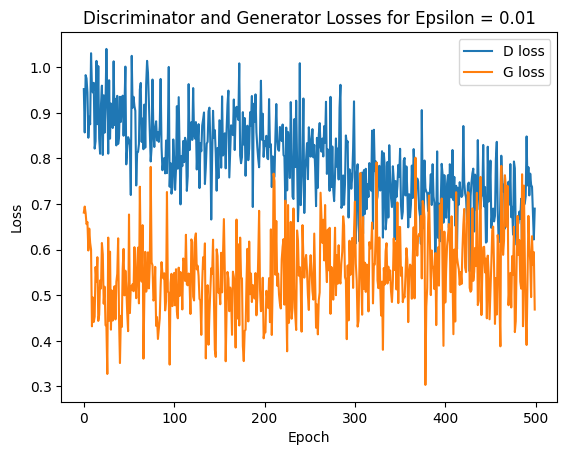

Epsilon: 0.1, Epoch: 1/500, D loss: 1.125963807106018, G loss: 0.5014289617538452
Epsilon: 0.1, Epoch: 2/500, D loss: 1.1169705390930176, G loss: 0.5536988973617554
Epsilon: 0.1, Epoch: 3/500, D loss: 1.0801777839660645, G loss: 0.5410380363464355
Epsilon: 0.1, Epoch: 4/500, D loss: 1.0451207160949707, G loss: 0.46325212717056274
Epsilon: 0.1, Epoch: 5/500, D loss: 0.9893984794616699, G loss: 0.5137693285942078
Epsilon: 0.1, Epoch: 6/500, D loss: 0.9522498846054077, G loss: 0.7750917673110962
Epsilon: 0.1, Epoch: 7/500, D loss: 0.9579545259475708, G loss: 0.6443685293197632
Epsilon: 0.1, Epoch: 8/500, D loss: 1.0542359352111816, G loss: 0.5207626819610596
Epsilon: 0.1, Epoch: 9/500, D loss: 0.9245085120201111, G loss: 0.6218645572662354
Epsilon: 0.1, Epoch: 10/500, D loss: 1.0085480213165283, G loss: 0.46452265977859497
Epsilon: 0.1, Epoch: 11/500, D loss: 0.9087382555007935, G loss: 0.5345828533172607
Epsilon: 0.1, Epoch: 12/500, D loss: 0.8637287020683289, G loss: 0.34345585107803345

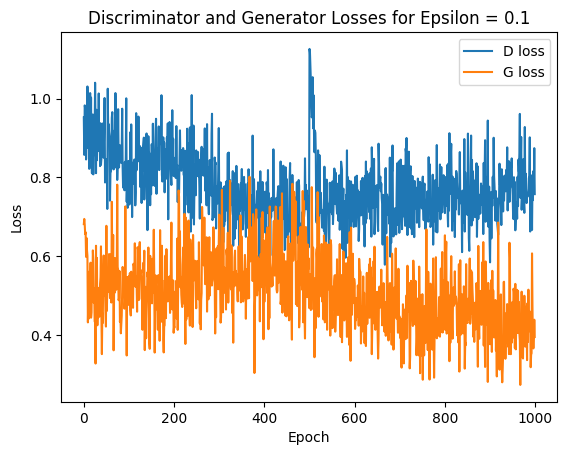

Epsilon: 0.5, Epoch: 1/500, D loss: 0.9079421162605286, G loss: 0.3145761489868164
Epsilon: 0.5, Epoch: 2/500, D loss: 0.9825669527053833, G loss: 0.4044460654258728
Epsilon: 0.5, Epoch: 3/500, D loss: 0.915649950504303, G loss: 0.270372211933136
Epsilon: 0.5, Epoch: 4/500, D loss: 0.9276638627052307, G loss: 0.37149778008461
Epsilon: 0.5, Epoch: 5/500, D loss: 0.9992067217826843, G loss: 0.48208415508270264
Epsilon: 0.5, Epoch: 6/500, D loss: 0.9454616904258728, G loss: 0.4032939672470093
Epsilon: 0.5, Epoch: 7/500, D loss: 0.8439057469367981, G loss: 0.3248351812362671
Epsilon: 0.5, Epoch: 8/500, D loss: 0.9218225479125977, G loss: 0.49334517121315
Epsilon: 0.5, Epoch: 9/500, D loss: 0.8417431116104126, G loss: 0.3276498317718506
Epsilon: 0.5, Epoch: 10/500, D loss: 0.7599274516105652, G loss: 0.3163551390171051
Epsilon: 0.5, Epoch: 11/500, D loss: 0.6823514699935913, G loss: 0.37946656346321106
Epsilon: 0.5, Epoch: 12/500, D loss: 0.8600490093231201, G loss: 0.4639378786087036
Epsil

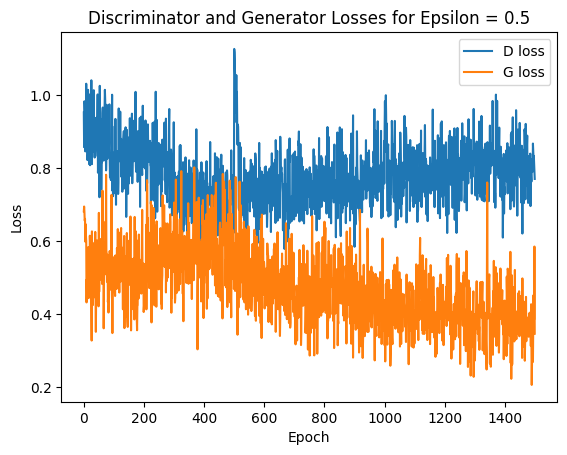

Epsilon: 1, Epoch: 1/500, D loss: 0.8432170748710632, G loss: 0.38760071992874146
Epsilon: 1, Epoch: 2/500, D loss: 0.8964704275131226, G loss: 0.35830262303352356
Epsilon: 1, Epoch: 3/500, D loss: 0.7051433324813843, G loss: 0.32086074352264404
Epsilon: 1, Epoch: 4/500, D loss: 0.7617149949073792, G loss: 0.44692692160606384
Epsilon: 1, Epoch: 5/500, D loss: 0.8153175711631775, G loss: 0.4359301030635834
Epsilon: 1, Epoch: 6/500, D loss: 0.7229294776916504, G loss: 0.3981262147426605
Epsilon: 1, Epoch: 7/500, D loss: 0.7111091613769531, G loss: 0.38067176938056946
Epsilon: 1, Epoch: 8/500, D loss: 0.8329410552978516, G loss: 0.3392491638660431
Epsilon: 1, Epoch: 9/500, D loss: 0.7499135732650757, G loss: 0.29701557755470276
Epsilon: 1, Epoch: 10/500, D loss: 0.8886538743972778, G loss: 0.34335094690322876
Epsilon: 1, Epoch: 11/500, D loss: 0.7585059404373169, G loss: 0.4308045506477356
Epsilon: 1, Epoch: 12/500, D loss: 0.8445358276367188, G loss: 0.3806215524673462
Epsilon: 1, Epoch:

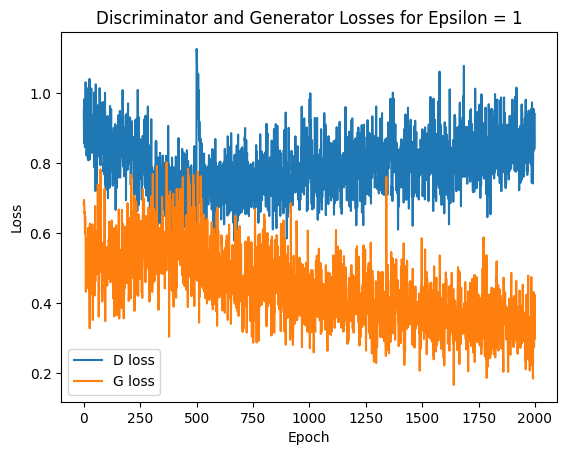

Epsilon: 5, Epoch: 1/500, D loss: 1.004335641860962, G loss: 0.26703760027885437
Epsilon: 5, Epoch: 2/500, D loss: 0.9723507165908813, G loss: 0.2677597105503082
Epsilon: 5, Epoch: 3/500, D loss: 0.9301954507827759, G loss: 0.3556479513645172
Epsilon: 5, Epoch: 4/500, D loss: 0.9973422884941101, G loss: 0.24274703860282898
Epsilon: 5, Epoch: 5/500, D loss: 0.8892756104469299, G loss: 0.27976155281066895
Epsilon: 5, Epoch: 6/500, D loss: 0.9404622316360474, G loss: 0.3277120888233185
Epsilon: 5, Epoch: 7/500, D loss: 0.844405472278595, G loss: 0.2960638105869293
Epsilon: 5, Epoch: 8/500, D loss: 0.7664786577224731, G loss: 0.3203975558280945
Epsilon: 5, Epoch: 9/500, D loss: 0.8213074207305908, G loss: 0.2194233238697052
Epsilon: 5, Epoch: 10/500, D loss: 0.8783336877822876, G loss: 0.21821379661560059
Epsilon: 5, Epoch: 11/500, D loss: 0.9334003925323486, G loss: 0.28326982259750366
Epsilon: 5, Epoch: 12/500, D loss: 0.9164333939552307, G loss: 0.25789716839790344
Epsilon: 5, Epoch: 13

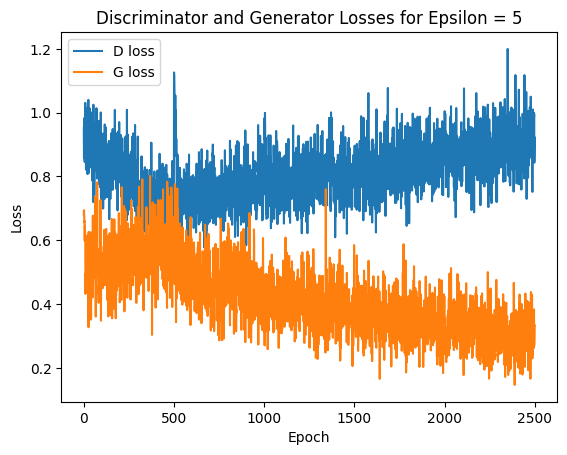

Epsilon: 10, Epoch: 1/500, D loss: 1.0521142482757568, G loss: 0.2417890429496765
Epsilon: 10, Epoch: 2/500, D loss: 0.9015466570854187, G loss: 0.26049286127090454
Epsilon: 10, Epoch: 3/500, D loss: 1.0656267404556274, G loss: 0.29318153858184814
Epsilon: 10, Epoch: 4/500, D loss: 0.9681471586227417, G loss: 0.2652977705001831
Epsilon: 10, Epoch: 5/500, D loss: 0.8906280994415283, G loss: 0.2877029478549957
Epsilon: 10, Epoch: 6/500, D loss: 0.9882175922393799, G loss: 0.17636004090309143
Epsilon: 10, Epoch: 7/500, D loss: 1.0489352941513062, G loss: 0.2753203511238098
Epsilon: 10, Epoch: 8/500, D loss: 0.9220222234725952, G loss: 0.20870642364025116
Epsilon: 10, Epoch: 9/500, D loss: 0.824867308139801, G loss: 0.217757910490036
Epsilon: 10, Epoch: 10/500, D loss: 0.8490939736366272, G loss: 0.2751787304878235
Epsilon: 10, Epoch: 11/500, D loss: 0.8938094973564148, G loss: 0.32549458742141724
Epsilon: 10, Epoch: 12/500, D loss: 0.9446967244148254, G loss: 0.22086425125598907
Epsilon: 

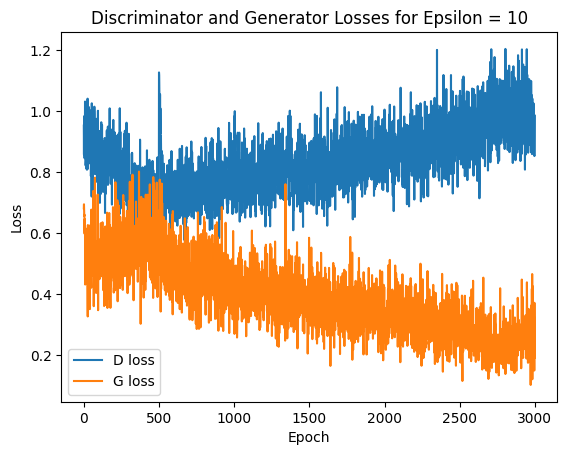

Epsilon: 15, Epoch: 1/500, D loss: 0.9820233583450317, G loss: 0.248048335313797
Epsilon: 15, Epoch: 2/500, D loss: 0.9260841608047485, G loss: 0.21093392372131348
Epsilon: 15, Epoch: 3/500, D loss: 0.9441162347793579, G loss: 0.15863105654716492
Epsilon: 15, Epoch: 4/500, D loss: 1.083885908126831, G loss: 0.2024616301059723
Epsilon: 15, Epoch: 5/500, D loss: 0.8825252056121826, G loss: 0.2120882272720337
Epsilon: 15, Epoch: 6/500, D loss: 1.212278127670288, G loss: 0.23948755860328674
Epsilon: 15, Epoch: 7/500, D loss: 0.9798338413238525, G loss: 0.20629557967185974
Epsilon: 15, Epoch: 8/500, D loss: 1.055160403251648, G loss: 0.24644583463668823
Epsilon: 15, Epoch: 9/500, D loss: 1.1848098039627075, G loss: 0.22234037518501282
Epsilon: 15, Epoch: 10/500, D loss: 1.0376644134521484, G loss: 0.32287368178367615
Epsilon: 15, Epoch: 11/500, D loss: 1.127667784690857, G loss: 0.2465878576040268
Epsilon: 15, Epoch: 12/500, D loss: 1.0234142541885376, G loss: 0.15486958622932434
Epsilon: 1

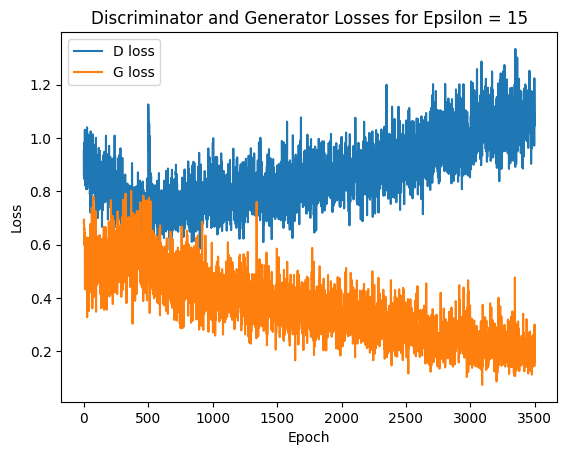

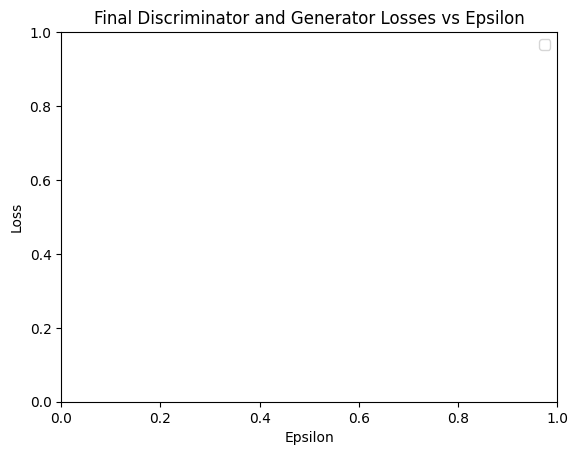

final_d_losses [0.689917, 0.75742763, 0.77000713, 0.94002527, 0.9215509, 0.9844409, 1.0478534]
final_g_losses [0.46871698, 0.39478904, 0.34618917, 0.29799795, 0.3330149, 0.19281763, 0.14687923]


In [ ]:
import matplotlib.pyplot as plt

epochs = 500
batch_size = 32
display_interval = 5000
losses = []

final_d_losses = []
final_g_losses = []

X_train = X_train / 127.5 - 1.

# Adversarial ground truths
valid = np.ones((batch_size, 1))
valid += 0.05 * np.random.random(valid.shape)
fake = np.zeros((batch_size, 1))
fake += 0.05 * np.random.random(fake.shape)

# Define the epsilon values you want to test
# epsilon_values = [0.01, 0.1, 0.5, 1, 5, 10, 15]
# epsilon_values = [0.0034, 0.034, 0.17, 0.34, 1.7, 3.4, 5.1]
epsilon_values = [0.000002, 0.00002, 0.0001, 0.0002, 0.001, 0.002, 0.003]
epsilon_values = {'0.01':0.000002,'0.1':0.00002,'0.5':0.0001,'1':0.0002,'5':0.001,'10':0.002,'15':0.003}

# Dictionary to store losses for each epsilon value
epsilon_losses = {epsilon: [] for epsilon in epsilon_values}


def gaussian_mechanism(data, epsilon, sensitivity):
    # Calculate the scale of the noise

    sigma = sensitivity / epsilon
    # Generate noise from a Gaussian distribution
    noise = np.random.normal(loc=0.0, scale=sigma, size=data.shape)
    # Add the noise to the data
    noisy_data = data + noise
    return noisy_data

# Loop over each epsilon value
for epsilon,val in epsilon_values.items():
    # Reset the model weights and other variables here if needed
    plt.figure()

    for epoch in range(epochs):
        # Train Discriminator
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # Generate noise with the current epsilon value
        noise = gaussian_mechanism(np.zeros((batch_size, latent_dim)), epsilon=val, sensitivity=0.0002)
        gen_imgs = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(imgs, valid)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
        g_loss = combined.train_on_batch(noise, valid)

        # Store the losses for the current epoch and epsilon value
        epsilon_losses[epsilon].append((d_loss[0], g_loss))

        losses.append((d_loss[0], g_loss))

        # Print the progress of each epoch
        print(f"Epsilon: {epsilon}, Epoch: {epoch + 1}/{epochs}, D loss: {d_loss[0]}, G loss: {g_loss}")

    d_losses, g_losses = zip(*losses)
    plt.plot(d_losses, label='D loss')
    plt.plot(g_losses, label='G loss')

    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title(f'Discriminator and Generator Losses for Epsilon = {epsilon}')
    plt.legend()
    plt.show()

    final_d_loss = losses[-1][0]
    final_g_loss = losses[-1][1]
    final_d_losses.append(final_d_loss)
    final_g_losses.append(final_g_loss)

# Plot the final losses against epsilon values
# plt.plot(epsilon_values, final_d_losses, marker='o', color='blue', label='Final D loss')
# plt.plot(epsilon_values, final_g_losses, marker='o', color='red', label='Final G loss')

plt.xlabel('Epsilon')
plt.ylabel('Loss')
plt.title('Final Discriminator and Generator Losses vs Epsilon')
plt.legend()
plt.show()

print("final_d_losses",final_d_losses)
print("final_g_losses",final_g_losses)

TRAINING WITHOUT NOISE

1/1 [==============================] - 0s 24ms/step
0 [D loss: 0.828718] [G loss: 0.050031]
1/1 [==============================] - 0s 23ms/step
1 [D loss: 0.864720] [G loss: 0.039538]
1/1 [==============================] - 0s 27ms/step
2 [D loss: 1.001421] [G loss: 0.000106]
1/1 [==============================] - 0s 23ms/step
3 [D loss: 1.018585] [G loss: -0.004019]
1/1 [==============================] - 0s 25ms/step
4 [D loss: 1.282517] [G loss: -0.010464]
1/1 [==============================] - 0s 16ms/step
5 [D loss: 1.146444] [G loss: -0.008701]
1/1 [==============================] - 0s 16ms/step
6 [D loss: 1.226286] [G loss: -0.033706]
1/1 [==============================] - 0s 19ms/step
7 [D loss: 1.287170] [G loss: -0.014063]
1/1 [==============================] - 0s 19ms/step
8 [D loss: 1.447416] [G loss: -0.007021]
1/1 [==============================] - 0s 17ms/step
9 [D loss: 1.491260] [G loss: -0.036640]
1/1 [==============================] - 0s 15ms/step
10 [D loss: 1.377046]

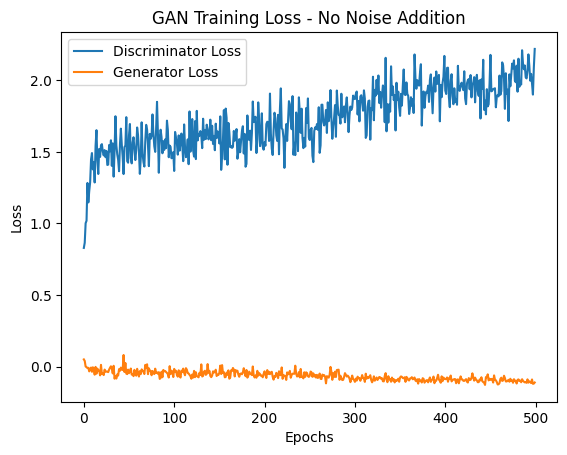

In [ ]:
import matplotlib.pyplot as plt

epochs = 500
batch_size = 32
display_interval = 5000
losses = []

# Normalizing the input
X_train = X_train / 127.5 - 1.

# Adversarial ground truths
valid = np.ones((batch_size, 1))
valid += 0.05 * np.random.random(valid.shape)
fake = np.zeros((batch_size, 1))
fake += 0.05 * np.random.random(fake.shape)

d_losses = []
g_losses = []

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    gen_imgs = generator.predict(np.random.normal(0, 1, (batch_size, latent_dim)))  # No noise added here

    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    g_loss = combined.train_on_batch(np.random.normal(0, 1, (batch_size, latent_dim)), valid)  # No noise added here

    d_losses.append(d_loss[0])
    g_losses.append(g_loss)

    # Print the progress
    print("%d [D loss: %f] [G loss: %f]" % (epoch, d_loss[0], g_loss))

    if epoch % 1000 == 0:
        losses.append((d_loss[0], g_loss))

    # if epoch % display_interval == 0:
    #     show_imgs(epoch)

# Plotting the losses
plt.plot(range(epochs), d_losses, label='Discriminator Loss')
plt.plot(range(epochs), g_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GAN Training Loss - No Noise Addition')
plt.legend()
plt.show()


In [ ]:

import tensorflow_privacy as tf_privacy
privacy_statement = tf_privacy.compute_dp_sgd_privacy_statement(
    number_of_examples=50000,  # Total number of training examples
    batch_size=32,            # Batch size used during training
    num_epochs=500,            # Number of epochs for training
    noise_multiplier=0.0002,     # Noise multiplier for differential privacy
    delta=1e-5,               # Privacy parameter delta
    used_microbatching=True,  # Whether microbatching is used (default: True)

)
print(privacy_statement)

DP-SGD performed over 50000 examples with 32 examples per iteration, noise
multiplier 0.0002 for 100 epochs with microbatching, and no bound on number of
examples per user.

This privacy guarantee protects the release of all model checkpoints in addition
to the final model.

Example-level DP with add-or-remove-one adjacency at delta = 1e-05 computed with
RDP accounting:
    Epsilon with each example occurring once per epoch:  5500000111.778
    Epsilon assuming Poisson sampling (*):               8593737360351.434

No user-level privacy guarantee is possible without a bound on the number of
examples per user.

(*) Poisson sampling is not usually done in training pipelines, but assuming
that the data was randomly shuffled, it is believed that the actual epsilon
should be closer to this value than the conservative assumption of an arbitrary
data order.



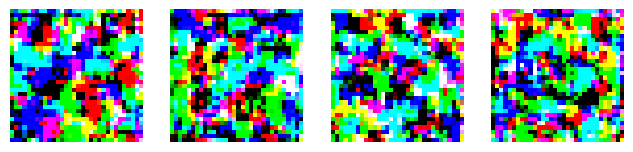

In [ ]:
# Generate random noise
num_images=4
noise = np.random.normal(0, 1, (num_images, latent_dim))

# Generate images using the generator model
generated_images = generator.predict(noise)

# Visualize the generated images
plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(5, 5, i + 1)
    plt.imshow((generated_images[i] + 1) / 2)  # Denormalize the image
    plt.axis('off')
plt.show()


DIRECT NOISE ADDITION

1/1 [==============================] - 0s 18ms/step
0 [D loss: 1.070812] [G loss: 0.232969]
1/1 [==============================] - 0s 17ms/step
1 [D loss: 1.080486] [G loss: 0.204614]
1/1 [==============================] - 0s 17ms/step
2 [D loss: 0.939967] [G loss: 0.203627]
1/1 [==============================] - 0s 18ms/step
3 [D loss: 1.140197] [G loss: 0.179940]
1/1 [==============================] - 0s 16ms/step
4 [D loss: 0.932995] [G loss: 0.174736]
1/1 [==============================] - 0s 16ms/step
5 [D loss: 1.047898] [G loss: 0.056653]
1/1 [==============================] - 0s 17ms/step
6 [D loss: 0.960984] [G loss: 0.262998]
1/1 [==============================] - 0s 18ms/step
7 [D loss: 1.077741] [G loss: 0.224208]
1/1 [==============================] - 0s 19ms/step
8 [D loss: 0.888927] [G loss: 0.213372]
1/1 [==============================] - 0s 18ms/step
9 [D loss: 1.079643] [G loss: 0.223879]
1/1 [==============================] - 0s 20ms/step
10 [D loss: 1.072317] [G los

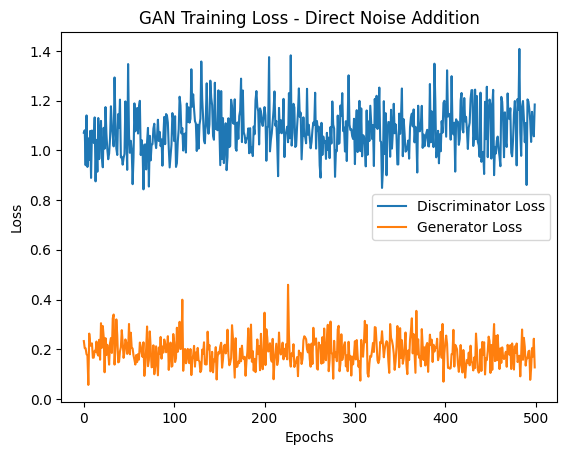

In [ ]:
import matplotlib.pyplot as plt

epochs = 500
batch_size = 32
display_interval = 5000
losses = []

# Normalizing the input
X_train = X_train / 127.5 - 1.

# Adversarial ground truths
valid = np.ones((batch_size, 1))
valid += 0.05 * np.random.random(valid.shape)
fake = np.zeros((batch_size, 1))
fake += 0.05 * np.random.random(fake.shape)

d_losses = []
g_losses = []

for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]

    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    gen_imgs = generator.predict(noise)

    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    g_loss = combined.train_on_batch(noise, valid)

    d_losses.append(d_loss[0])
    g_losses.append(g_loss)

    # Print the progress
    print("%d [D loss: %f] [G loss: %f]" % (epoch, d_loss[0], g_loss))

    if epoch % 1000 == 0:
        losses.append((d_loss[0], g_loss))

    # if epoch % display_interval == 0:
    #     show_imgs(epoch)

# Plotting the losses
plt.plot(range(epochs), d_losses, label='Discriminator Loss')
plt.plot(range(epochs), g_losses, label='Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GAN Training Loss - Direct Noise Addition')
plt.legend()
plt.show()


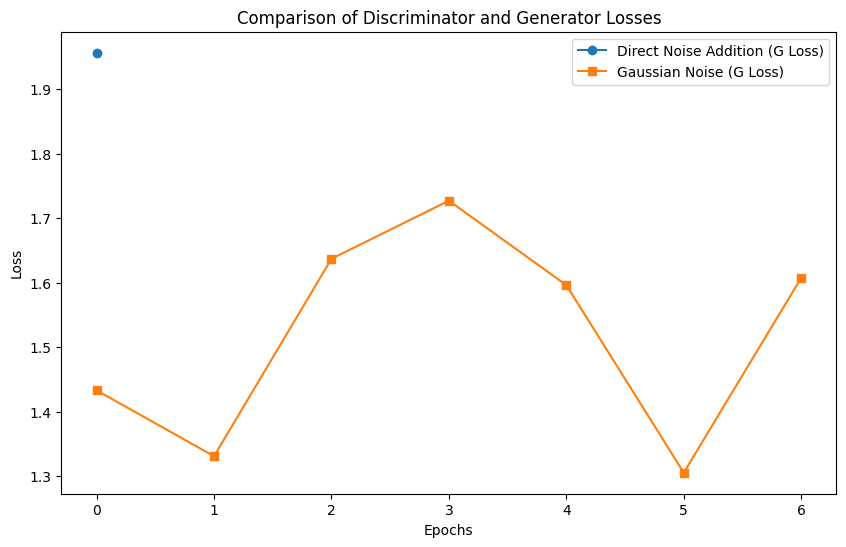

In [ ]:
import matplotlib.pyplot as plt

# Define the losses obtained from both methods
final_d_losses_direct = [0.310324]
final_g_losses_direct = [1.956590]



final_d_losses=[0.7781408, 0.8226532, 0.6434375, 0.7294655, 0.67841375, 0.5946336, 0.61178726]
final_g_losses=[1.4329264, 1.3307705, 1.6369992, 1.7270927, 1.5961378, 1.3052036, 1.6073872]
# Plotting the losses
plt.figure(figsize=(10, 6))


plt.plot(final_g_losses_direct, label='Direct Noise Addition (G Loss)', marker='o')

plt.plot(final_g_losses, label='Gaussian Noise (G Loss)', marker='s')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Comparison of Discriminator and Generator Losses')
plt.legend()
plt.grid(False)
plt.show()


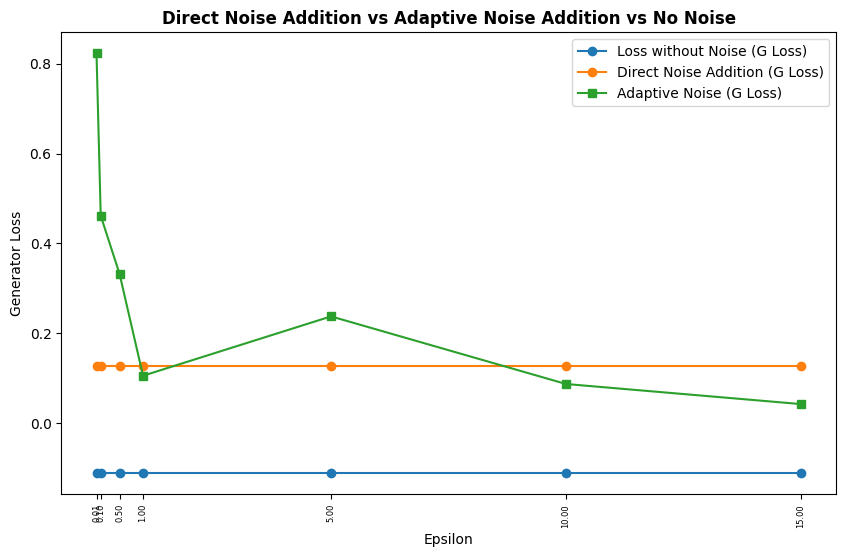

In [ ]:
import matplotlib.pyplot as plt

# Define the losses obtained from both methods
# final_g_losses_direct = [1.956590]

final_g_losses_direct = [0.127099]

final_d_losses=[0.7781408, 0.8226532, 0.6434375, 0.7294655, 0.67841375, 0.5946336, 0.61178726]
# final_g_losses=[1.4329264, 1.3307705, 1.6369992, 1.7270927, 1.5961378, 1.3052036, 1.6073872]

# final_g_losses = [0.9094212055206299, 1.1026403903961182, 1.0397162437438965, 0.9853092432022095, 0.9636438488960266, 1.0018062591552734, 0.5424169301986694]
final_g_losses = [0.8236210346221924, 0.46154749393463135, 0.3322761356830597, 0.10544861108064651, 0.23754669725894928, 0.08704174309968948, 0.042322710156440735]

epsilon_values = [0.01, 0.1, 0.5, 1, 5, 10, 15]

loss_without_noise = [-0.111268]
# Plotting the losses
plt.figure(figsize=(10, 6))

plt.plot(epsilon_values, loss_without_noise * len(epsilon_values), label='Loss without Noise (G Loss)', marker='o')
plt.plot(epsilon_values, final_g_losses_direct * len(epsilon_values), label='Direct Noise Addition (G Loss)', marker='o')
plt.plot(epsilon_values, final_g_losses, label='Adaptive Noise (G Loss)', marker='s')

plt.xlabel('Epsilon')
plt.ylabel('Generator Loss')
plt.title('Direct Noise Addition vs Adaptive Noise Addition vs No Noise', fontdict={'fontsize': 12, 'fontweight': 'bold'})
plt.legend()
plt.xticks(epsilon_values, fontsize=6)
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.grid(False)
plt.show()

# import matplotlib.pyplot as plt

# final_g_losses_direct = [0.127099]
# # final_g_losses = [0.8236210346221924, 0.46154749393463135, 0.3322761356830597, 0.10544861108064651, 0.23754669725894928, 0.08704174309968948, 0.042322710156440735]
# final_g_losses = [1.4615135192871094, 1.1317658424377441, 1.0049935579299927, 1.0572445392608643, 1.1066813468933105, 0.9592038989067078, 0.8994452357292175]
# epsilon_values =[0.01, 0.1, 0.5, 1, 5, 10, 15]

# # Loss without any noise addition
# loss_without_noise = [-0.111268]

# # Plotting the losses
# plt.figure(figsize=(10, 6))

# plt.plot(epsilon_values, final_g_losses_direct * len(epsilon_values), label='Direct Noise Addition (G Loss)', marker='o')

# plt.plot(epsilon_values, loss_without_noise * len(epsilon_values), label='Loss without Noise (G Loss)', marker='o')
# plt.plot(epsilon_values, final_g_losses, label='Adaptive Noise (G Loss)', marker='s')

# # Plotting the loss without any noise addition
# # plt.scatter(0, loss_without_noise, color='red', label='No Noise Addition (G Loss)', marker='x')

# plt.xlabel('Epsilon')
# plt.ylabel('Generator Loss')
# plt.title('Direct Noise Addition vs Adaptive Noise Addition vs No Noise', fontdict={'fontsize': 20, 'fontweight': 'bold'})

# plt.xticks(epsilon_values, fontsize=6)
# plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

# plt.legend()
# plt.grid(False)
# plt.show()


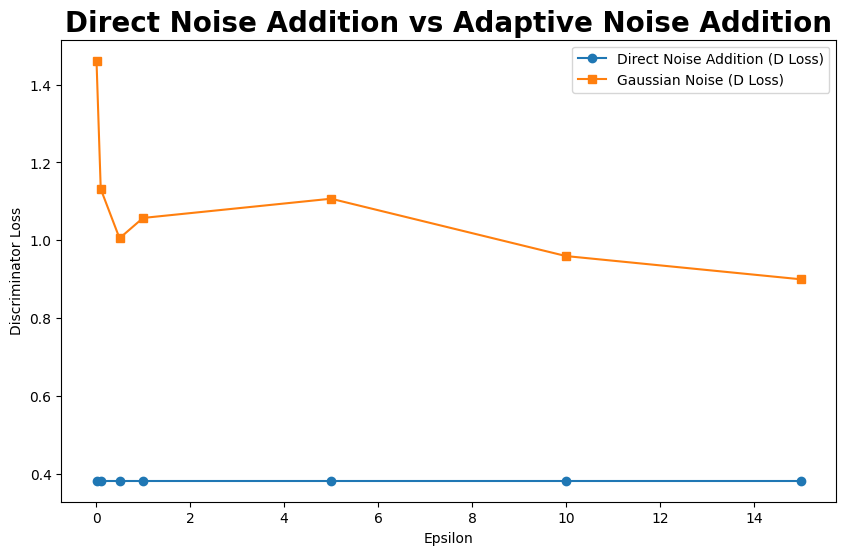

In [ ]:
import matplotlib.pyplot as plt

# Define the losses obtained from both methods
final_g_losses_direct = [0.381563]

final_d_losses=[0.7781408, 0.8226532, 0.6434375, 0.7294655, 0.67841375, 0.5946336, 0.61178726]
final_g_losses=[1.4615135192871094, 1.1317658424377441, 1.0049935579299927, 1.0572445392608643, 1.1066813468933105, 0.9592038989067078, 0.8994452357292175]

epsilon_values = [0.01, 0.1, 0.5, 1, 5, 10, 15]

# Plotting the losses
plt.figure(figsize=(10, 6))

plt.plot(epsilon_values, final_g_losses_direct * len(epsilon_values), label='Direct Noise Addition (D Loss)', marker='o')
plt.plot(epsilon_values, final_g_losses, label='Gaussian Noise (D Loss)', marker='s')

plt.xlabel('Epsilon')
plt.ylabel('Discriminator Loss')
plt.title('Direct Noise Addition vs Adaptive Noise Addition', fontdict={'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.grid(False)
plt.show()
